Import delle librerie e assegnazione dei path dei 3 xlsx

In [1]:
import numpy as np

In [2]:
import statsmodels.api as sm

In [3]:
import pandas as pd

In [4]:
import seaborn as sn
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
quot = 'quot.xlsx'
comm = 'comm.xlsx'
coop = 'coop.xlsx'

Import dei 3 file excel come pandas dataframe importando solo il foglio di lavoro "Reults".

In [39]:
df_quot = pd.read_excel(quot, sheet_name='Results')
df_comm = pd.read_excel(comm, sheet_name='Results')
df_coop = pd.read_excel(coop, sheet_name='Results')


Esplorazione dei dati partendo dal dataset relativo alle banche quotate:

In [40]:
df = df_quot.copy()
print(f"Il database contiene: {df.shape[0]} banche e {df_quot.shape[1]} colonne")

Il database contiene: 299 banche e 24 colonne


Le colonne presenti sono:

In [41]:
# Nome colonne
for i, col in enumerate(df.columns):
    print(i+1, "\t", repr(col))

1 	 'Unnamed: 0'
2 	 'Company name Latin alphabet'
3 	 'BvD ID number'
4 	 'Loans\nth EUR 2019'
5 	 'Total assets\nth EUR 2019'
6 	 'Customer deposits\nth EUR 2019'
7 	 'Total equity\nth EUR 2019'
8 	 'Total equity / Total assets (%)\n2019'
9 	 'Total equity / Risk-weighted assets (RWAs) (%)\n2019'
10 	 'NPL ratio (as reported) (%)\n2019'
11 	 'Impaired loans / Average risk weighted assets (RWAs) (%)\n2019'
12 	 'Lagged impaired loans (Impaired loans % prior year gross customer loans & advances) (%)\n2019'
13 	 'Impaired loans / Total equity (%)\n2019'
14 	 'Impaired loans / Gross customer loans & advances (%)\n2019'
15 	 'Net income\nth EUR 2019'
16 	 'Return on average equity (ROAE) (%)\n2019'
17 	 'Return on average assets (ROAA) (%)\n2019'
18 	 'Net interest margin (interest earning assets) (%)\n2019'
19 	 'Cost to income (Efficiency) ratio (%)\n2019'
20 	 'Dividends related to the period / Net income (Dividend pay-out ratio) (%)\n2019'
21 	 'Liquid assets\nth EUR 2019'
22 	 'Liqui

In [42]:
# Valori n.a. somma per colonna
temp = df
cols = temp.columns.drop(["Company name Latin alphabet", "BvD ID number"])
temp[cols] = temp[cols].apply(pd.to_numeric, errors="coerce")
total = temp.shape[0]
print(temp.isna().sum()/total*100)

Unnamed: 0                                                                                        0.000000
Company name Latin alphabet                                                                       0.000000
BvD ID number                                                                                     0.000000
Loans\nth EUR 2019                                                                                4.682274
Total assets\nth EUR 2019                                                                         3.010033
Customer deposits\nth EUR 2019                                                                    5.351171
Total equity\nth EUR 2019                                                                         3.010033
Total equity / Total assets (%)\n2019                                                             3.010033
Total equity / Risk-weighted assets (RWAs) (%)\n2019                                             22.073579
NPL ratio (as reported) (%)\n2019    

In [43]:
df.describe()

,Unnamed: 0,Loans\nth EUR 2019,Total assets\nth EUR 2019,Customer deposits\nth EUR 2019,Total equity\nth EUR 2019,Total equity / Total assets (%)\n2019,Total equity / Risk-weighted assets (RWAs) (%)\n2019,NPL ratio (as reported) (%)\n2019,Impaired loans / Average risk weighted assets (RWAs) (%)\n2019,Lagged impaired loans (Impaired loans % prior year gross customer loans & advances) (%)\n2019,...,Net income\nth EUR 2019,Return on average equity (ROAE) (%)\n2019,Return on average assets (ROAA) (%)\n2019,Net interest margin (interest earning assets) (%)\n2019,Cost to income (Efficiency) ratio (%)\n2019,Dividends related to the period / Net income (Dividend pay-out ratio) (%)\n2019,Liquid assets\nth EUR 2019,Liquid assets / Total assets (%)\n2019,Basel Liquidity Coverage Ratio (LCR) (%)\n2019,Basel Net Stable Funding Ratio (NSFR) (%)\n2019
count,299.000000,2.850000e+02,2.900000e+02,2.830000e+02,2.900000e+02,290.000000,233.000000,49.000000,203.000000,249.000000,...,2.860000e+02,281.000000,281.000000,286.000000,286.000000,69.000000,2.900000e+02,290.000000,144.000000,60.000000
mean,150.000000,8.224551e+07,1.659763e+08,7.773175e+07,1.111055e+07,10.572432,19.611248,6.685306,9.545352,9.209844,...,5.851431e+05,7.384412,0.722483,2.260611,67.556142,47.781451,4.903947e+07,26.695728,238.837153,129.170000
std,86.458082,1.538977e+08,3.382872e+08,1.450580e+08,2.078090e+07,10.581493,7.011213,8.017865,10.976412,14.268507,...,1.980189e+06,11.899592,1.389758,1.320711,27.779615,56.518728,1.138568e+08,12.224690,303.647018,25.143963
min,1.000000,7.194866e+04,5.342500e+04,4.012000e+03,1.575700e+04,2.660966,6.461794,0.900000,0.261138,0.232951,...,-1.968500e+07,-56.180544,-12.548639,-0.680272,0.976104,0.000000,1.603700e+04,3.430717,1.520000,50.000000
25%,75.500000,4.110029e+06,5.591641e+06,4.584250e+06,5.545666e+05,6.396703,16.412999,2.510000,3.637887,2.858990,...,1.922197e+04,4.663147,0.382960,1.306881,53.593706,14.549139,1.261030e+06,17.148369,147.000000,113.000000
50%,150.000000,1.613300e+07,2.271424e+07,1.633958e+07,2.066364e+06,9.083493,18.283370,3.900000,5.811199,4.777840,...,1.410008e+05,7.829110,0.631826,2.017391,61.563103,35.011710,5.740606e+06,24.824261,173.000000,127.500000
75%,224.500000,7.948700e+07,1.321960e+08,7.652692e+07,1.081147e+07,11.961301,21.368796,6.310000,10.391810,8.881774,...,5.804869e+05,11.860347,1.110854,2.953079,71.776554,68.226002,3.048114e+07,34.510934,235.500000,133.305000
max,299.000000,9.374230e+08,2.164713e+09,8.346670e+08,1.118450e+08,99.981463,82.555891,33.500000,59.805651,126.605134,...,8.583000e+06,34.876677,9.873240,9.380008,221.597309,398.410062,7.876030e+08,69.921573,3528.000000,216.000000



Si procede quindi con l'eliminare le colonne che non verranno utilizzate:

In [44]:
to_be_dropped = ["BvD ID number",
                 "Loans\nth EUR 2019",
                 "Customer deposits\nth EUR 2019",
                 "Total equity\nth EUR 2019",
                 "Total equity / Risk-weighted assets (RWAs) (%)\n2019",
                 "NPL ratio (as reported) (%)\n2019",
                 "Impaired loans / Average risk weighted assets (RWAs) (%)\n2019",
                 "Impaired loans / Total equity (%)\n2019",
                 "Net income\nth EUR 2019",
                 "Dividends related to the period / Net income (Dividend pay-out ratio) (%)\n2019",
                 "Liquid assets\nth EUR 2019",
                 "Liquid assets / Total assets (%)\n2019",
                 "Basel Liquidity Coverage Ratio (LCR) (%)\n2019",
                 "Basel Net Stable Funding Ratio (NSFR) (%)\n2019"]

df.drop(df.columns[df.columns.str.contains('unnamed',case=False)], inplace=True, axis=1)
df.drop(to_be_dropped, inplace= True, axis=1)

E con il rinominare le colonne con nomi di più facile comprensione

In [45]:
df.rename(columns={"Company name Latin alphabet":"Bank name",
                    "Total assets\nth EUR 2019":"Total assets",
                    "Total equity / Total assets (%)\n2019":"Tot Equity/Assets",
                    "Lagged impaired loans (Impaired loans % prior year gross customer loans & advances) (%)\n2019":"1y Lagged Impaired Ratio",
                    "Impaired loans / Gross customer loans & advances (%)\n2019":"Imp Loans/Gross Loans",
                    "Return on average equity (ROAE) (%)\n2019":"ROAE",
                    "Return on average assets (ROAA) (%)\n2019":"ROAA",
                    "Net interest margin (interest earning assets) (%)\n2019":"NIM",
                    "Cost to income (Efficiency) ratio (%)\n2019":"CtI Ratio"}, inplace=True)

In [46]:
for i, col in enumerate(df.columns):
    print(i+1, "\t", repr(col))

1 	 'Bank name'
2 	 'Total assets'
3 	 'Tot Equity/Assets'
4 	 '1y Lagged Impaired Ratio'
5 	 'Imp Loans/Gross Loans'
6 	 'ROAE'
7 	 'ROAA'
8 	 'NIM'
9 	 'CtI Ratio'


Si procede quindi con l'eliminazione delle banche che presentano campi non completi

In [47]:
cols = df.columns.drop("Bank name")
df[cols] = df[cols].apply(pd.to_numeric, errors="coerce")
total = df.shape[0]
print(temp.isna().sum()/total*100)
df.dropna(inplace= True)

Bank name                    0.000000
Total assets                 3.010033
Tot Equity/Assets            3.010033
1y Lagged Impaired Ratio    16.722408
Imp Loans/Gross Loans       14.715719
ROAE                         6.020067
ROAA                         6.020067
NIM                          4.347826
CtI Ratio                    4.347826
dtype: float64


In [48]:
df.describe()

,Total assets,Tot Equity/Assets,1y Lagged Impaired Ratio,Imp Loans/Gross Loans,ROAE,ROAA,NIM,CtI Ratio
count,2.480000e+02,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,1.643977e+08,9.265732,9.238813,8.484472,8.162851,0.776228,2.344943,65.767338
std,3.451839e+08,3.345339,14.290023,10.631495,10.740664,0.944838,1.330424,24.486043
min,1.714438e+05,2.860898,0.232951,0.150672,-52.023547,-3.911833,0.038627,36.406455
25%,8.052028e+06,6.416326,2.915819,2.683966,4.797127,0.388988,1.353215,53.087864
50%,2.290634e+07,9.083493,4.783217,4.530978,8.098454,0.648315,2.198325,60.984110
75%,1.255760e+08,12.175325,8.881814,8.477798,12.079135,1.135867,3.024959,71.096477
max,2.164713e+09,17.979965,126.605134,50.191433,34.876677,3.058446,9.380008,221.597309


In [49]:
print(f"Il database contiene: {df.shape[0]} banche e {df.shape[1]} colonne")

Il database contiene: 248 banche e 9 colonne


Si procede quindi con l'analisi attraverso regressione lineare multivariata

<AxesSubplot:>

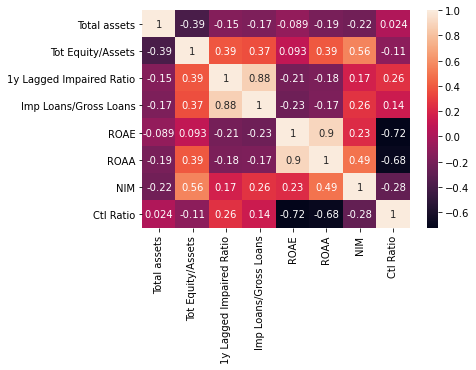

In [50]:
sn.heatmap(df.corr(), annot=True)

In [51]:
# Variabili dipendenti
X = df[['Total assets',
        'Tot Equity/Assets',
        'ROAE',
        'ROAA',
        'NIM',
        'CtI Ratio']]
X = sm.add_constant(X) # theta0 = 1

# Variabile indipendente
y = df["1y Lagged Impaired Ratio"]

# Genera OLS Model
est = sm.OLS(y, X).fit()
# Genera summary
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     1y Lagged Impaired Ratio   R-squared:                       0.482
Model:                                  OLS   Adj. R-squared:                  0.469
Method:                       Least Squares   F-statistic:                     37.36
Date:                      Wed, 24 Feb 2021   Prob (F-statistic):           6.79e-32
Time:                              02:03:56   Log-Likelihood:                -929.43
No. Observations:                       248   AIC:                             1873.
Df Residuals:                           241   BIC:                             1897.
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -37.4265      4.512     -8.294      0.000     -46.315     -28.538
Total assets       8.504e-10    2.1e-09      0.405      0.686   -3.28e-09    4.98e-09
Tot Equity/Assets     3.5055      0.304     11.547      0.000       2.907       4.103
ROAE                  2.0230      0.220      9.212      0.000       1.590       2.456
ROAA                -28.3747      2.712    -10.464      0.000     -33.716     -23.033
NIM                   3.9682      0.712      5.573      0.000       2.565       5.371
CtI Ratio             0.1559      0.040      3.899      0.000       0.077       0.235
==============================================================================
Omnibus:                       86.698   Durbin-Watson:                   1.162
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              438.681
Skew:                           1.305   Prob(JB):                     5.52e-96
Kurtosis:                       8.970   Cond. No.                     2.72e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
# Variabili dipendenti
X = df[['Total assets',
        'Tot Equity/Assets',
        'ROAE',
        'ROAA',
        'NIM',
        'CtI Ratio']]
X = sm.add_constant(X) # theta0 = 1

# Variabile indipendente
y = df["Imp Loans/Gross Loans"]

# Genera OLS Model
est = sm.OLS(y, X).fit()
# Genera summary
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Imp Loans/Gross Loans   R-squared:                       0.381
Model:                               OLS   Adj. R-squared:                  0.366
Method:                    Least Squares   F-statistic:                     24.74
Date:                   Wed, 24 Feb 2021   Prob (F-statistic):           8.59e-23
Time:                           02:03:58   Log-Likelihood:                -878.12
No. Observations:                    248   AIC:                             1770.
Df Residuals:                        241   BIC:                             1795.
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -12.1460      3.669     -3.310      0.001     -19.374      -4.918
Total assets      -1.279e-09   1.71e-09     -0.750      0.454   -4.64e-09    2.08e-09
Tot Equity/Assets     1.9508      0.247      7.903      0.000       1.465       2.437
ROAE                  0.9646      0.179      5.402      0.000       0.613       1.316
ROAA                -17.0931      2.205     -7.752      0.000     -21.436     -12.750
NIM                   3.4863      0.579      6.021      0.000       2.346       4.627
CtI Ratio            -0.0002      0.033     -0.008      0.994      -0.064       0.064
==============================================================================
Omnibus:                       62.929   Durbin-Watson:                   1.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.931
Skew:                           1.298   Prob(JB):                     9.06e-27
Kurtosis:                       5.206   Cond. No.                     2.72e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""